# Data Cleaning and Feature Engineering


---

#### Data scraped from SGCarMart. Refer to notebook "Scraping from SGCarMart" for the scraping process.

A total of 7 steps in the data cleaning process:
* Step 1: Remove unwanted strings
* Step 2: Split columns
* Step 3: Convert data to appropriate data types
* Step 4: Inspect and impute null values
* Step 5: Map string values to numeric values
* Step 6: Create new columns
* Step 7: Drop unnecessary columns and rearrange columns

In [1]:
import pandas as pd
import random
import csv
import re
import matplotlib.pyplot as plt 
import numpy as np
from datetime import date

In [2]:
car_df= pd.read_csv('./combined_data_final.csv')

In [3]:
car_df.shape

(11211, 18)

In [4]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11211 entries, 0 to 11210
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   url                11211 non-null  object
 1   Posted On          11211 non-null  object
 2   Car                11211 non-null  object
 3   Price              11185 non-null  object
 4   Seller             11211 non-null  object
 5   Mileage            9485 non-null   object
 6   Road Tax           11107 non-null  object
 7   Deg Value          10834 non-null  object
 8   COE                10945 non-null  object
 9   Engine Cap         11157 non-null  object
 10  Curb Weight        11084 non-null  object
 11  Manufactured       11211 non-null  int64 
 12  Transmission       11211 non-null  object
 13  OMV                11200 non-null  object
 14  ARF                11195 non-null  object
 15  Power              11126 non-null  object
 16  No. of Owner       11211 non-null  objec

### <font color= 'red'> Step 1: Remove unwated substrings

In [5]:
def replace_str(df, element):
    new_df= df.str.replace(element, '', regex= True)
    return new_df

In [6]:
unwanted_str_list= [',', '$', ' /yr', ' as of today ', 'change', ' cc', ' kg', ' km']

for element in unwanted_str_list:
    car_df['Mileage']= replace_str(car_df['Mileage'], element)
    car_df['Price']= replace_str(car_df['Price'], element)
    car_df['COE']= replace_str(car_df['COE'], element)
    car_df['OMV']= replace_str(car_df['OMV'], element)
    car_df['ARF']= replace_str(car_df['ARF'], element)
    car_df['Road Tax']= replace_str(car_df['Road Tax'], element)
    car_df['Deg Value']= replace_str(car_df['Deg Value'], element)
    car_df['Engine Cap']= replace_str(car_df['Engine Cap'], element)
    car_df['Curb Weight']= replace_str(car_df['Curb Weight'], element)

In [7]:
car_df['Deg Value']= replace_str(car_df['Deg Value'], '(')
car_df['Deg Value']= replace_str(car_df['Deg Value'], ')')

### <font color= 'red'> Step 2: Split columns 

In [8]:
car_df.head()

,url,Posted On,Car,Price,Seller,Mileage,Road Tax,Deg Value,COE,Engine Cap,Curb Weight,Manufactured,Transmission,OMV,ARF,Power,No. of Owner,Registration Date
0,info.php?ID=1115700&DL=1000,18-Feb-23,Mercedes-Benz 230CE (COE till 04/2031),55000,Ownership Transfer,NaN,280,NaN,4732,2299,1380,1985,Manual,6020,6020,100.0 kW (134 bhp),1,19-Apr-2021(8yrs 1mth COE left)
1,info.php?ID=1179373&DL=3034,14-Mar-23,BMW 3 Series 318i Sunroof (COE till 09/2030),74900,SG Car Consign Pte Ltd,142000 (11.6k),1570,26350,34935,1995,1390,2010,Auto,28495,28495,100.0 kW (134 bhp),3,28-Dec-2010(7yrs 6mths 12days COE left)
2,info.php?ID=1172340&DL=3106,11-Mar-23,BMW 3 Series 318i Sunroof (COE till 07/2030),74800,Bz Carz Pte Ltd,118000 (9.3k),1570,24702,33568,1995,1390,2010,Auto,27109,27109,100.0 kW (134 bhp),4,26-Jul-2010(7yrs 4mths 7days COE left)
3,info.php?ID=1178900&DL=2138,17-Mar-23,Nissan Teana 2.0A (COE till 01/2029),59800,RNJ Motoring,NaN,1815,18346,31335,1997,1450,2008,Auto,31130,31130,100.0 kW (134 bhp),3,23-Jan-2009(5yrs 10mths 4days COE left)
4,info.php?ID=1152785&DL=4189,1-Feb-23,BMW 3 Series 318i Sunroof (COE till 11/2030),78888,4Forwheel Pte Ltd,NaN,1570,30827,40014,1995,1390,2010,Auto,29216,29216,100.0 kW (134 bhp),More than 6,29-Nov-2010(7yrs 8mths 10days COE left)


#### Column 'Car'

In [9]:
#separated the column "car" delimited by '(' into two:

car_df[['car_make', 'title_subtext']]= car_df['Car'].str.split('(', n=1, expand=True)
car_df['title_subtext'] = replace_str(car_df['title_subtext'], ')')

#### Column 'Mileage'

In [10]:
#separated the column "Mileage" delimited by '(' into two:
car_df[['total_mileage', 'mileage/yr']]= car_df['Mileage'].str.split('(', n=1, expand=True)
car_df['mileage/yr'] = replace_str(car_df['mileage/yr'], ')')

#dropped column 'Mileage'
car_df= car_df.drop('Mileage', axis=1)

#### Column 'Registration Date'

In [11]:
#separated the column "Registration" delimited by '(' into two:
car_df[['registration_date', 'COE_left']]= car_df['Registration Date'].str.split('(', n=1, expand=True)
car_df['COE_left'] = replace_str(car_df['COE_left'], ')')

#dropped column 'Registration Date'
car_df= car_df.drop('Registration Date', axis=1)

#### Column 'COE left'

In [12]:
unwanted_str_list= [' COE left', 's', 'r', 'th', 'ay']

for element in unwanted_str_list:
    car_df['COE_left']= replace_str(car_df['COE_left'], element)

In [13]:
#testing the syntax to extract the numbers from the string.
text2 = "6m 12d"

pattern_y = r'(\d+)y'
match_y = re.search(pattern_y, text2)

pattern_m = r'(\d+)m'
match_m = re.search(pattern_m, text2)

pattern_d = r'(\d+)d'
match_d = re.search(pattern_d, text2)

years = 0
months = 0
days = 0

if match_y:
    years = match_y.group(1)
if match_m:
    months = match_m.group(1)
if match_d:
    days = match_d.group(1)
    
    print("Years:", years)
    print("Months:", months)
    print("Days:", days)

Years: 0
Months: 6
Days: 12


In [14]:
COE_list= car_df['COE_left'].tolist()
len(COE_list)

11211

In [15]:
updated_COE_list= []

for i in range(len(COE_list)):
    text= str(COE_list[i])
    
    pattern_y = r'(\d+)y'
    match_y = re.search(pattern_y, text)

    pattern_m = r'(\d+)m'
    match_m = re.search(pattern_m, text)

    pattern_d = r'(\d+)d'
    match_d = re.search(pattern_d, text)

    years = 0
    months = 0
    days = 0
    COE_dict = {}
    
    if match_y:
        years = match_y.group(1)
    
    if match_m:
        months = match_m.group(1)
    
    if match_d:
        days = match_d.group(1)
    
    COE_dict['COE_yr']= int(years)
    COE_dict['COE_mth']= int(months)
    COE_dict['COE_days']= int(days)
    COE_dict['Total_COE_left']= int(years)*365 + int(months)*31 + int(days)
    
    updated_COE_list.append(COE_dict)

In [16]:
updated_COE_df= pd.DataFrame(updated_COE_list)

In [17]:
updated_COE_df.head()

,COE_yr,COE_mth,COE_days,Total_COE_left
0,8,1,0,2951
1,7,6,12,2753
2,7,4,7,2686
3,5,10,4,2139
4,7,8,10,2813


In [18]:
car_df['Total_COE_left']= updated_COE_df['Total_COE_left']

#### Column 'Power'

In [19]:
car_df[['Power_kw', 'Power_bhp']]= car_df['Power'].str.split('(', n=1, expand=True)
car_df['Power_bhp'] = replace_str(car_df['Power_bhp'], ')')
car_df['Power_kw'] = replace_str(car_df['Power_kw'], ' kW')

#### Column 'COE'

In [20]:
car_df['COE'].sort_values(ascending=False)

9727     New 10-yr COE
9726     New 10-yr COE
2897             99999
5065             99999
3546             99999
             ...      
11004              NaN
11008              NaN
11019              NaN
11027              NaN
11078              NaN
Name: COE, Length: 11211, dtype: object

In [21]:
car_df[car_df['COE'] == 'New 10-yr COE']

,url,Posted On,Car,Price,Seller,Road Tax,Deg Value,COE,Engine Cap,Curb Weight,...,No. of Owner,car_make,title_subtext,total_mileage,mileage/yr,registration_date,COE_left,Total_COE_left,Power_kw,Power_bhp
9726,info.php?ID=1102942&DL=2405,19-Feb-23,Mercedes-Benz S-Class S500L Mild Hybrid AMG Li...,567800,Star Deals Gallery,NaN,NaN,New 10-yr COE,2999,2820,...,1,Mercedes-Benz S-Class S500L Mild Hybrid AMG Li...,None,NaN,NaN,NaN,NaN,0,NaN,NaN
9727,info.php?ID=1141484&DL=4345,10-Mar-23,Toyota Granace Diesel 2.8A G 8-Seater,348888,Comfort Yana Pte Ltd,3000,NaN,New 10-yr COE,2754,NaN,...,1,Toyota Granace Diesel 2.8A G 8-Seater,None,8,None,NaN,NaN,0,NaN,NaN


In [22]:
#drop these two rows as data is incomplete:

car_df= car_df.drop(index= [9726, 9727]).reset_index(drop= True)

### <font color= 'red'> Step 3: Convert columns to appropriate data type

In [23]:
car_df['Posted On']= pd.to_datetime(car_df['Posted On'])
car_df['registration_date']= pd.to_datetime(car_df['registration_date'])

In [24]:
car_df.columns

Index(['url', 'Posted On', 'Car', 'Price', 'Seller', 'Road Tax', 'Deg Value',
       'COE', 'Engine Cap', 'Curb Weight', 'Manufactured', 'Transmission',
       'OMV', 'ARF', 'Power', 'No. of Owner', 'car_make', 'title_subtext',
       'total_mileage', 'mileage/yr', 'registration_date', 'COE_left',
       'Total_COE_left', 'Power_kw', 'Power_bhp'],
      dtype='object')

In [25]:
#Converting these columns to float type:
columns= ['Price', 'Road Tax', 'Deg Value', 'Engine Cap', 'Curb Weight', 'Power_kw', 'total_mileage', 'OMV',
          'ARF', 'COE']

for column in columns:
    car_df[column]= car_df[column].astype(float)

In [26]:
#renaming the columns for ease of data cleaning opeartion:

car_df.rename(columns= {'Road Tax': 'road_tax_per_yr', 
                        'Deg Value': 'dereg_value', 
                        'Engine Cap': 'engine_cap_cc',
                        'Curb Weight': 'curb_weight_kg',
                        'No. of Owner': 'owner_number'}, inplace= True)

### <font color= 'red'> Step 4: Inspect and impute null values:

In [27]:
#drop duplicate listings

car_df= car_df.drop_duplicates(subset=['url'])

In [28]:
# dropping listings that are vintage cars which were manufactured before 1990. Vintage cars are evaluated differently so should
# not be included in the analysis. 

car_df= car_df.drop(car_df[car_df['Manufactured'] < 1990].index)

In [29]:
car_df= car_df.reset_index(drop= True)

#### Price

In [30]:
car_df['Price'].isnull().sum()

22

In [31]:
#dropped rows that had null values in the column 'Price'.
car_df= car_df.dropna(subset=['Price']).reset_index(drop= True)

#### OMV

In [32]:
#checked the manufactured year of the rows that had null values in the column 'OMV'.
car_df[car_df['OMV'].isnull()]['Manufactured']

Series([], Name: Manufactured, dtype: int64)

#### ARF

In [33]:
#checked the manufactured year of the rows that had null values in the column 'ARF'.
car_df[car_df['ARF'].isnull()]

,url,Posted On,Car,Price,Seller,road_tax_per_yr,dereg_value,COE,engine_cap_cc,curb_weight_kg,...,owner_number,car_make,title_subtext,total_mileage,mileage/yr,registration_date,COE_left,Total_COE_left,Power_kw,Power_bhp
617,info.php?ID=1166383&DL=4323,2023-01-21,MG ZS Electric Deluxe,134800.0,SG Car Choice Pte Ltd,1531.0,64938.0,70901.0,NaN,1534.0,...,1,MG ZS Electric Deluxe,None,11000.0,None,2022-05-12,9y 1m 24d,3340,105.0,140 bhp
621,info.php?ID=1151177&DL=1264,2023-03-15,MG ZS Electric Deluxe,136800.0,Car Lingual,1531.0,62617.0,68001.0,NaN,1534.0,...,1,MG ZS Electric Deluxe,None,10400.0,None,2022-05-30,9y 2m 12d,3359,105.0,140 bhp
622,info.php?ID=1176255&DL=1000,2023-03-02,MG ZS Electric Deluxe,136600.0,Ownership Transfer,1531.0,65093.0,70901.0,NaN,1534.0,...,1,MG ZS Electric Deluxe,None,8000.0,None,2022-05-20,9y 2m 2d,3349,105.0,140 bhp


In [34]:
car_df[car_df['car_make'] == 'MG ZS Electric Deluxe']

,url,Posted On,Car,Price,Seller,road_tax_per_yr,dereg_value,COE,engine_cap_cc,curb_weight_kg,...,owner_number,car_make,title_subtext,total_mileage,mileage/yr,registration_date,COE_left,Total_COE_left,Power_kw,Power_bhp
617,info.php?ID=1166383&DL=4323,2023-01-21,MG ZS Electric Deluxe,134800.0,SG Car Choice Pte Ltd,1531.0,64938.0,70901.0,NaN,1534.0,...,1,MG ZS Electric Deluxe,None,11000.0,None,2022-05-12,9y 1m 24d,3340,105.0,140 bhp
621,info.php?ID=1151177&DL=1264,2023-03-15,MG ZS Electric Deluxe,136800.0,Car Lingual,1531.0,62617.0,68001.0,NaN,1534.0,...,1,MG ZS Electric Deluxe,None,10400.0,None,2022-05-30,9y 2m 12d,3359,105.0,140 bhp
622,info.php?ID=1176255&DL=1000,2023-03-02,MG ZS Electric Deluxe,136600.0,Ownership Transfer,1531.0,65093.0,70901.0,NaN,1534.0,...,1,MG ZS Electric Deluxe,None,8000.0,None,2022-05-20,9y 2m 2d,3349,105.0,140 bhp


In [35]:
#ARF calculation formula
ARF_calculation= {'First $20,000 of OMV': '100% of OMV', 
                  'Next $20,000 of OMV (i.e. $20,001 to $40,000)': '140% of OMV',
                  'Next $20,000 of OMV (i.e. $40,001 to $60,000)': '190% of OMV',
                  'Next $20,000 of OMV (i.e. $60,001 to $80,000)': '250% of OMV',
                  'Above $80,000 of OMV (i.e. $80,001 and above)': '320% of OMV'}

In [36]:
#imputed the null values in these 3 rows with the calculated values. 
ARF_row= [617, 621, 622]

for i in ARF_row:
    car_df.loc[i, 'ARF']= 20000 + (car_df.loc[i, 'OMV']- 20000)*1.4

In [37]:
car_df[car_df['car_make'] == 'MG ZS Electric Deluxe']['ARF']

617    39184.2
621    38650.8
622    39429.2
Name: ARF, dtype: float64

#### Power_kw (keep null values until EDA)

In [38]:
car_df['Power_kw'].isnull().sum()

53

#### 'total_mileage

In [39]:
car_df['total_mileage'].isnull().sum()

1603

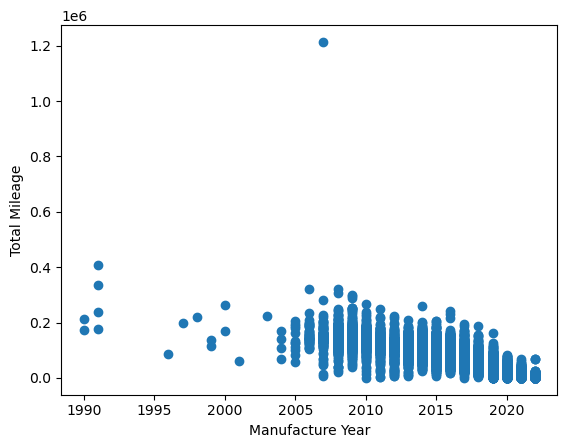

In [40]:
plt.scatter(car_df['Manufactured'], car_df['total_mileage'])

plt.xlabel('Manufacture Year')
plt.ylabel('Total Mileage')

plt.show()                                           

In [41]:
average_mileage_by_year= pd.DataFrame(car_df.groupby(['Manufactured'])['total_mileage'].mean()).reset_index()

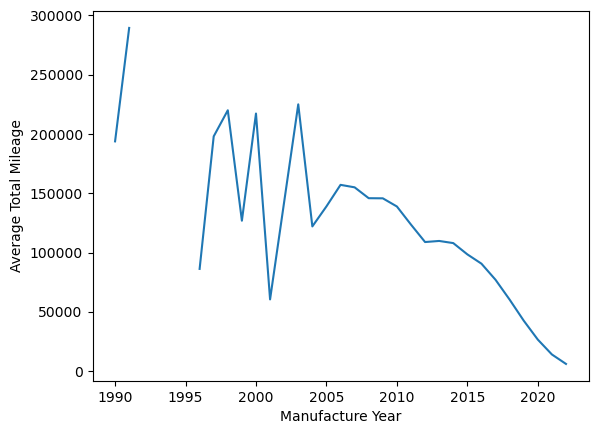

In [42]:
plt.plot(average_mileage_by_year['Manufactured'], average_mileage_by_year['total_mileage'])

plt.xlabel('Manufacture Year')
plt.ylabel('Average Total Mileage')

plt.show()     

In [43]:
average_mileage_by_year.set_index('Manufactured', inplace= True)
average_mileage_by_year

,total_mileage
Manufactured,
1990,193773.000000
1991,289450.000000
1992,NaN
1993,NaN
1996,86232.000000
1997,198000.000000
1998,220000.000000
1999,126879.500000
2000,217250.000000


In [44]:
# the average total_mileage and manufactured year is inversely correlated for cars manufactured after 2006. 
# Therefore, listings that have null values for 'total_mileage' and were manufactured after 2006 will be imputed with the means.

car_df[(car_df['Manufactured'] >= 2006) & (car_df['total_mileage'].isnull())]['Manufactured'].unique()

array([2008, 2010, 2012, 2013, 2009, 2019, 2016, 2020, 2018, 2015, 2017,
       2014, 2021, 2006, 2007, 2011, 2022], dtype=int64)

In [45]:
#impute the null values in the car_df['total_mileage'] column with the average mileage according to the manufactured year:

year_list= [2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]

for index, row in car_df.iterrows():
    
    for year in year_list:
        
        if row['Manufactured'] == year and np.isnan(row['total_mileage']) == True:
            car_df.loc[index, 'total_mileage'] = average_mileage_by_year['total_mileage'][year]

In [46]:
# drop rows that have null values in column total_mileage as it is an important feature. 

car_df= car_df.dropna(subset= ['total_mileage']).reset_index(drop= True)

#### 'engine_cap_cc' (keep null values until EDA)

In [47]:
car_df['engine_cap_cc'].isnull().sum()

54

In [48]:
car_df[car_df['engine_cap_cc'].isnull()]['car_make'].unique()

array(['MG ZS Electric Deluxe', 'Polestar 2 Long Range Single Motor',
       'Polestar 2 Electric Long Range Single Motor',
       'Tesla Model 3 Electric Standard Range Plus RWD',
       'Tesla Model 3 Electric Standard Range Plus',
       'Tesla Model 3 Electric Standard Plus',
       'BMW iX3 Electric M-Sport Impressive Sunroof',
       'Mercedes-Benz EQE350+ Electric Exclusive Luxury',
       'Mercedes-Benz EQE350+ Electric AMG Line Premium Sunroof',
       'Tesla Model 3 Electric Standard Range',
       'Mercedes-Benz EQS Electric EQS450+ AMG Line Premium Hyperscreen',
       'Tesla Model 3 Electric Performance AWD',
       'BMW iX Electric xDrive40', 'BMW iX Electric xDrive40 Sport',
       'BMW i7 Electric xDrive60 Gran Lusso',
       'Porsche Taycan Electric 4S Performance Battery Plus',
       'Mercedes-Benz EQS Electric EQS450+ AMG Line Premium'],
      dtype=object)

#### Upon research, it was found that electric cars do not use CC numbers because of the way that the engine/motor works. Therefore, all listings with null values in engine_cap_cc are electric cars. To keep the null values untill EDA.


#### 'curb_weight' (keep null values until EDA)

In [49]:
car_df['curb_weight_kg'].isnull().sum()

68

#### 'COE'

In [50]:
car_df['COE'].isnull().sum()

# 'COE' is an important feature, therefore the null values must be imputed.

264

In [51]:
car_df[car_df['COE'].isnull()]['Total_COE_left'].unique()

array([3650, 1825,   88, 1774,  304,   42, 3607,  492, 1173,  234],
      dtype=int64)

In [52]:
car_df[car_df['Total_COE_left'] == 3650]['COE'].unique()

# these are cars with brand new 10-year COE. The null values can then be imputed with the latest COE premium price. 

array([nan])

#### Latest COE price (1st round bidding in Mar 2023)
CatA: Cars with engine capacity up to 1,600cc & power output 97kW.
* COE: $88,000 

CatB: Cars with engine capacity above 1,600cc or power output 97kW.
* COE: $115,501 

In [53]:
# impute listings' that have Total_COE_left of 3650 with the latest COE price according to engine capacity.

for index, row in car_df.iterrows():
    
    if row['Total_COE_left'] == 3650:
        if row['engine_cap_cc'] <= 1600:
            COE = 88000
        elif row['engine_cap_cc'] > 1600:
            COE = 115501
        
        car_df.loc[index, 'COE']= COE

In [54]:
car_df[(car_df['Total_COE_left'] == 1825) & (np.isnan(car_df['COE']) == True)]['Car']

# These cars have just renewed their COE to 5-year. Therefore, 'COE' can be imputed with the latest price for 5-year COE.

57                  BMW 3 Series 316i Sport (New 5-yr COE)
64                  BMW 3 Series 316i Sport (New 5-yr COE)
459              Volkswagen Touran 1.4A TSI (New 5-yr COE)
460              Volkswagen Touran 1.4A TSI (New 5-yr COE)
611               Toyota Wish 1.8A Elegance (New 5-yr COE)
1499       Mercedes-Benz C-Class C180 Coupe (New 5-yr COE)
1517       Mercedes-Benz C-Class C180 Coupe (New 5-yr COE)
1535     Mercedes-Benz C-Class C180 Avantgarde (New 5-y...
1872                 Toyota Vellfire 2.4A Z (New 5-yr COE)
2267              Audi Q3 2.0A TFSI Quattro (New 5-yr COE)
2918             BMW 5 Series 520i Highline (New 5-yr COE)
2919             BMW 5 Series 520i Highline (New 5-yr COE)
6636                     Toyota Vios 1.5A G (New 5-yr COE)
7736              Toyota Corolla Altis 1.6A (New 5-yr COE)
7741              Toyota Corolla Altis 1.6A (New 5-yr COE)
7747              Toyota Corolla Altis 1.6A (New 5-yr COE)
8646             Hyundai Elantra 1.6A Elite (New 5-yr CO

#### Latest 5-year COE price (1st round bidding in Mar 2023): 

* Cat A: $88,000 * 0.5 = $44,000 
* Cat B: $115,501 * 0.5 = $55,750.50

In [55]:
# impute listings' that have Total_COE_left of 1825 with the latest 5-year COE price according to engine capacity.

for index, row in car_df.iterrows():
    
    if row['Total_COE_left'] == 1825 and row['engine_cap_cc'] <= 1600:
        car_df.loc[index, 'COE'] = 44000
    elif row['Total_COE_left'] == 1825 and row['engine_cap_cc'] > 1600:
        car_df.loc[index, 'COE'] = 55750.50

In [56]:
car_df[car_df['COE'].isnull()].index

Int64Index([304, 1536, 1750, 2380, 5277, 5657, 5740, 9146], dtype='int64')

In [57]:
# drop rows that have nil COE values as it is an important feature.
car_df= car_df.drop(car_df[car_df['COE'].isnull()].index).reset_index(drop= True)

#### 'dereg_value'

In [58]:
car_df['dereg_value'].isnull().sum()

# 'dereg_value' is an important feature, therefore the null values must be imputed.

327

In [59]:
car_df[car_df['dereg_value'].isnull()]['Total_COE_left'].unique()

array([3650, 1825, 2056, 1302, 1535,  834,  574, 2203,  198, 2815, 3066,
        680, 2146, 3353,    0, 2358, 1867, 2033, 1097, 1170, 1410, 2513,
       2871,  519, 3150, 2710, 2878, 2583, 3025, 2996, 1838, 1426, 1035,
       2494, 3311, 3551, 3363, 3001, 2905, 2061, 3055, 2964, 2105, 1823,
       2270, 3595, 1592, 2690, 2596,  687, 1998, 1143,  441,  410,  378,
        433,  358,  264,  234, 1976, 2144, 2471,    6, 3173], dtype=int64)

#### Formula for deregistration value of a car: [COE rebate + PARF rebate] = Deregistration value

COE rebate = (Quota Premium Paid x Number of months left)/120 months

PARF rebate is dependent on the age of vehicle at deregistration:
* Not exceeding 5 years : 75% of ARF paid
* Above 5 years but not exceeding 6 years: 70% of ARF paid
* Above 6 years but not exceeding 7 years: 65% of ARF paid
* Above 7 years but not exceeding 8 years: 60% of ARF paid
* Above 8 years but not exceeding 9 years: 55% of ARF paid
* Above 9 years but not exceeding 10 years: 50% of ARF paid
* Above 10 years: N.A.

In [60]:
# calculate the age of car based on manufacture year. 

car_df['car_age'] = 2023 - car_df['Manufactured']

In [61]:
# replace the null values in 'dereg_value' based on the criteria and formula of deregistration value:

for index, row in car_df.iterrows():
    
    if np.isnan(row['dereg_value']) == True:
        COE_rebate= (row['Total_COE_left']/3650)*row['COE']
        
        if row['car_age'] <= 5:
            PARF_rebate= row['ARF']*0.75
        elif row['car_age'] <= 6:
            PARF_rebate= row['ARF']*0.70
        elif row['car_age'] <= 7:
            PARF_rebate= row['ARF']*0.65
        elif row['car_age'] <= 8:
            PARF_rebate= row['ARF']*0.60
        elif row['car_age'] <= 9:
            PARF_rebate= row['ARF']*0.55
        elif row['car_age'] <= 10:
            PARF_rebate= row['ARF']*0.50
        else:
            PARF_rebate= 0
            
        dereg_value= COE_rebate + PARF_rebate
        car_df.loc[index, 'dereg_value']= dereg_value

In [62]:
car_df['dereg_value'].isnull().sum()

0

### <font color= 'red'> Step 5: Convert string values to numeric values:

#### 'Seller Type'

In [63]:
car_df= car_df.reset_index(drop= True)

In [64]:
#create new column 'seller_type':

seller_type_list= []

for index, row in car_df.iterrows():
    if row['Seller'] == 'Ownership Transfer':  #'Ownership Transfer' means that the car is listed by car owner.
        seller_type= 0
    else:
        seller_type= 1
    seller_type_list.append(seller_type)

In [65]:
car_df['seller_type']= pd.DataFrame(seller_type_list)

#### 'Transmission Type'

In [66]:
car_df['transmission_type']= car_df['Transmission'].map({'Manual': 0, 'Auto': 1})

#### 'No. of Owners'

In [67]:
car_df['owner_number'].value_counts()

1              4256
2              3114
3              1572
4               842
5               427
6               207
More than 6     123
Name: owner_number, dtype: int64

In [68]:
# replace 'More than 6' with a numeric value: 10

car_df['owner_number']= car_df['owner_number'].replace('More than 6', 10).astype(int)

### <font color= 'red'> Step 6: Create new columns:

#### 'car_brand' and 'brand_category'

In [69]:
#create two new columns: 'car_brand' and 'brand_category'

car_df['car_brand']= car_df['car_make'].str.split().str[0]

In [70]:
car_df['car_brand']= car_df['car_brand'].replace('Land', 'Land-Rover')

In [71]:
car_df[car_df['car_brand'] == 'Mercedes'].index

Int64Index([5845], dtype='int64')

In [72]:
car_df.loc[5845, 'car_brand']= 'Mercedes-Benz'

In [73]:
car_brand_list= car_df['car_brand'].unique().tolist()
car_brand_list

['BMW',
 'Nissan',
 'Opel',
 'Toyota',
 'Mercedes-Benz',
 'Mazda',
 'Honda',
 'Suzuki',
 'Chevrolet',
 'Volkswagen',
 'Jeep',
 'Kia',
 'Hyundai',
 'MG',
 'Audi',
 'Subaru',
 'Ssangyong',
 'Saab',
 'Mitsubishi',
 'Skoda',
 'SEAT',
 'Land-Rover',
 'Jaguar',
 'Peugeot',
 'Renault',
 'Citroen',
 'Dodge',
 'Lexus',
 'Volvo',
 'DS7',
 'Alfa',
 'Mitsuoka',
 'Infiniti',
 'Maxus',
 'Polestar',
 'Porsche',
 'Ford',
 'Hummer',
 'Chrysler',
 'Maserati',
 'Tesla',
 'CUPRA',
 'Cadillac',
 'Bentley',
 'Rolls-Royce',
 'Maybach',
 'Lamborghini',
 'Proton',
 'Perodua',
 'Daihatsu',
 'Freed',
 'MINI',
 'Fiat',
 'Smart']

In [74]:
luxury_car_brand = ['Mercedes-Benz', 'BMW', 'Audi', 'Porsche', 'Land-Rover', 'Jaguar', 'Lexus', 'Volvo', 'Rolls-Royce', 'Infiniti',
                    'Maserati', 'Bentley', 'Maybach', 'Lamborghini', 'Alfa', 'DS7', 'Daimler', 'Tesla', 'CUPRA', 'MINI']
normal_car_brand = []

for car in car_brand_list:
    if car not in luxury_car_brand:
        normal_car_brand.append(car)

In [75]:
brand_cat_list= []
for index, row in car_df.iterrows():
    if row['car_brand'] in luxury_car_brand:
        brand_cat= 0 # 0 is luxury car
    else:
        brand_cat= 1 # 1 is normal car
    
    brand_cat_list.append(brand_cat)

In [76]:
car_df['brand_category'] = pd.DataFrame(brand_cat_list)

### <font color= 'red'> Step 7: Drop unnecessary columns and rearrange the dataframe

In [77]:
car_df.shape

(10541, 30)

In [78]:
#generated a list of column names

car_df.columns

Index(['url', 'Posted On', 'Car', 'Price', 'Seller', 'road_tax_per_yr',
       'dereg_value', 'COE', 'engine_cap_cc', 'curb_weight_kg', 'Manufactured',
       'Transmission', 'OMV', 'ARF', 'Power', 'owner_number', 'car_make',
       'title_subtext', 'total_mileage', 'mileage/yr', 'registration_date',
       'COE_left', 'Total_COE_left', 'Power_kw', 'Power_bhp', 'car_age',
       'seller_type', 'transmission_type', 'car_brand', 'brand_category'],
      dtype='object')

In [79]:
car_df= car_df.drop(columns= ['Car', 'mileage/yr', 'Power', 'Power_bhp', 'COE_left', 'title_subtext'])

In [80]:
car_df.columns

Index(['url', 'Posted On', 'Price', 'Seller', 'road_tax_per_yr', 'dereg_value',
       'COE', 'engine_cap_cc', 'curb_weight_kg', 'Manufactured',
       'Transmission', 'OMV', 'ARF', 'owner_number', 'car_make',
       'total_mileage', 'registration_date', 'Total_COE_left', 'Power_kw',
       'car_age', 'seller_type', 'transmission_type', 'car_brand',
       'brand_category'],
      dtype='object')

In [81]:
#Rearranged the sequence of the columns:

car_df= car_df.reindex(columns=
               ['url', 'Posted On', 'car_make', 'Seller', 'seller_type', 'Price', 'dereg_value', 'COE',
                'Manufactured', 'car_age', 'road_tax_per_yr', 'OMV', 'ARF', 'total_mileage', 'Total_COE_left',   
                'engine_cap_cc', 'curb_weight_kg', 'Transmission', 'transmission_type', 'Power_kw', 
                'owner_number', 'registration_date', 'car_brand', 'brand_category'])

In [82]:
car_df.head()

,url,Posted On,car_make,Seller,seller_type,Price,dereg_value,COE,Manufactured,car_age,...,Total_COE_left,engine_cap_cc,curb_weight_kg,Transmission,transmission_type,Power_kw,owner_number,registration_date,car_brand,brand_category
0,info.php?ID=1179373&DL=3034,2023-03-14,BMW 3 Series 318i Sunroof,SG Car Consign Pte Ltd,1,74900.0,26350.0,34935.0,2010,13,...,2753,1995.0,1390.0,Auto,1,100.0,3,2010-12-28,BMW,0
1,info.php?ID=1172340&DL=3106,2023-03-11,BMW 3 Series 318i Sunroof,Bz Carz Pte Ltd,1,74800.0,24702.0,33568.0,2010,13,...,2686,1995.0,1390.0,Auto,1,100.0,4,2010-07-26,BMW,0
2,info.php?ID=1178900&DL=2138,2023-03-17,Nissan Teana 2.0A,RNJ Motoring,1,59800.0,18346.0,31335.0,2008,15,...,2139,1997.0,1450.0,Auto,1,100.0,3,2009-01-23,Nissan,1
3,info.php?ID=1152785&DL=4189,2023-02-01,BMW 3 Series 318i Sunroof,4Forwheel Pte Ltd,1,78888.0,30827.0,40014.0,2010,13,...,2813,1995.0,1390.0,Auto,1,100.0,10,2010-11-29,BMW,0
4,info.php?ID=1146859&DL=1017,2023-03-07,BMW 3 Series 318i Sunroof,San Hup Bee (S) Pte Ltd,1,78800.0,29149.0,38216.0,2010,13,...,2785,1995.0,1390.0,Auto,1,100.0,5,2010-11-29,BMW,0


In [83]:
car_df.to_csv('car_df_cleaned.csv')

In [84]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10541 entries, 0 to 10540
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   url                10541 non-null  object        
 1   Posted On          10541 non-null  datetime64[ns]
 2   car_make           10541 non-null  object        
 3   Seller             10541 non-null  object        
 4   seller_type        10541 non-null  int64         
 5   Price              10541 non-null  float64       
 6   dereg_value        10541 non-null  float64       
 7   COE                10541 non-null  float64       
 8   Manufactured       10541 non-null  int64         
 9   car_age            10541 non-null  int64         
 10  road_tax_per_yr    10482 non-null  float64       
 11  OMV                10541 non-null  float64       
 12  ARF                10541 non-null  float64       
 13  total_mileage      10541 non-null  float64       
 14  Total_

### <font color= 'red'> Data Cleaning Part 2 (after EDA)

#### Power_kw

In [85]:
# create a list of unique car_makes that have nil Power_kw.
car_nil_power= car_df[car_df['Power_kw'].isnull()]['car_make'].unique().tolist()
len(car_nil_power)

23

In [86]:
# search for the same car_make in the car_df and extract the mode of Power_kw values. 

car_power_dict= {}
for car in car_nil_power:
    power= car_df[car_df['car_make'] == car]['Power_kw'].mode().values.tolist()
    car_power_dict[car]= power

car_power_dict

{'Toyota Noah Hybrid 1.8A X': [100.0],
 'Honda Odyssey Hybrid 2.0A e-HEV Absolute': [242.0],
 'Mercedes-Benz C-Class C200 Mild Hybrid AMG Line Premium': [165.0],
 'Toyota Alphard Hybrid 2.5A SR C-Package Moonroof': [145.0],
 'Mercedes-Benz EQS Electric EQS450+ AMG Line Premium': [],
 'Mercedes-Benz S-Class S500L Mild Hybrid AMG Line 4MATIC Premium Plus Executive': [336.0],
 'Mercedes-Benz 200E ': [],
 'Mercedes-Benz S-Class 300SEL ': [],
 'BMW 3 Series 318i ': [100.0],
 'BMW 3 Series 320i ': [135.0],
 'Mercedes-Benz E-Class E200 ': [135.0],
 'BMW 5 Series 520i ': [135.0],
 'Jaguar S-Type 3.0SE ': [],
 'Honda Shuttle 1.5A G Honda Sensing': [95.0],
 'BMW 3 Series 316i ': [100.0],
 'Mercedes-Benz C-Class C200 ': [],
 'BMW 2 Series 216i Gran Coupe Sport': [80.0],
 'Honda Accord 2.0A EX ': [],
 'Toyota Estima 3.0A ': [],
 'Mercedes-Benz A-Class A200 AMG Line': [120.0],
 'Honda Fit 1.3A GF': [73.0],
 'Honda Fit 1.3A': [72.0],
 'Volkswagen Golf 1.6A ': []}

In [87]:
# create a list of power_kw that corresponds to the car_nil_power list.

power_list = [100.0, 242.0, 165.0, 145.0, 245.0, 336.0, 170.0, 170.0, 100.0, 135.0, 135.0, 135.0, 175.0, 95.0, 100.0, 150.0, 
              80.0, 114.0, 164.0, 120.0, 73.0, 72.0, 86.0]
len(power_list)

23

In [88]:
power_df= pd.DataFrame({'car_make': car_nil_power, 'power_kw': power_list}).set_index('car_make')
power_df

,power_kw
car_make,
Toyota Noah Hybrid 1.8A X,100.0
Honda Odyssey Hybrid 2.0A e-HEV Absolute,242.0
Mercedes-Benz C-Class C200 Mild Hybrid AMG Line Premium,165.0
Toyota Alphard Hybrid 2.5A SR C-Package Moonroof,145.0
Mercedes-Benz EQS Electric EQS450+ AMG Line Premium,245.0
Mercedes-Benz S-Class S500L Mild Hybrid AMG Line 4MATIC Premium Plus Executive,336.0
Mercedes-Benz 200E,170.0
Mercedes-Benz S-Class 300SEL,170.0
BMW 3 Series 318i,100.0


In [89]:
# impute the null values in column 'Power_kw' according to the car_make:

for index, row in car_df.iterrows():
    
    if np.isnan(row['Power_kw']) == True:
        
        for car in car_nil_power:
            car_df.loc[index, 'Power_kw'] = power_df['power_kw'][car]

In [90]:
# check for null values in the column 'Power_kw' after imputation.

car_df['Power_kw'].isnull().sum()

0

#### engine_cap_cc

In [91]:
car_df[car_df['engine_cap_cc'].isnull()][['car_make', 'Power_kw']]

,car_make,Power_kw
615,MG ZS Electric Deluxe,105.0
619,MG ZS Electric Deluxe,105.0
620,MG ZS Electric Deluxe,105.0
4359,Polestar 2 Long Range Single Motor,170.0
4360,Polestar 2 Electric Long Range Single Motor,170.0
4361,Polestar 2 Long Range Single Motor,170.0
4362,Polestar 2 Electric Long Range Single Motor,170.0
5231,Tesla Model 3 Electric Standard Range Plus RWD,208.0
5232,Tesla Model 3 Electric Standard Range Plus RWD,208.0
5233,Tesla Model 3 Electric Standard Range Plus RWD,208.0


In [92]:
engine_cap_cc_nil= car_df[car_df['engine_cap_cc'].isnull()]['Power_kw'].unique().tolist()
engine_cap_cc_nil

[105.0,
 170.0,
 208.0,
 210.0,
 215.0,
 239.0,
 245.0,
 377.0,
 390.0,
 420.0,
 495.0,
 86.0]

In [93]:
engine_cap_cc_list= []

for item in engine_cap_cc_nil:
    engine_cap_cc= car_df[car_df['Power_kw'] == item]['engine_cap_cc'].mean()
    engine_cap_cc_list.append(engine_cap_cc)
engine_cap_cc_list

[1809.8478260869565,
 2557.5593220338983,
 nan,
 2879.6,
 1998.0,
 nan,
 2931.7906976744184,
 6752.0,
 3799.0,
 6634.375,
 nan,
 1739.012987012987]

In [94]:
car_df[car_df['Power_kw'] == 210]['engine_cap_cc']

5239    2953.0
5240    3604.0
5241    1991.0
5242       NaN
5243    2925.0
5244    2925.0
Name: engine_cap_cc, dtype: float64

#### road_tax_per_yr

In [95]:
car_df['road_tax_per_yr'].isnull().sum()

59

In [96]:
car_nil_rt= car_df[car_df['road_tax_per_yr'].isnull()]['car_make'].unique().tolist()
car_nil_rt

['Toyota Noah Hybrid 1.8A X',
 'Toyota Voxy Hybrid 1.8A S G',
 'Audi A6 Plug-in Hybrid 2.0A 50 TFSI e Quattro S-Tronic Sport',
 'Mercedes-Benz CLA-Class CLA200 AMG Line Premium Plus',
 'BMW 5 Series 520i Mild Hybrid Luxury',
 'BMW 5 Series 520i Mild Hybrid M-Sport',
 'Volvo S60 Mild Hybrid B4 2.0A R-Design',
 'Toyota Alphard Hybrid 2.5A SR C-Package Moonroof',
 'Mercedes-Benz E-Class E200 Mild Hybrid AMG Line',
 'Mercedes-Benz E-Class E200 Mild Hybrid Exclusive Sunroof',
 'Toyota Camry Hybrid 2.5A Ascent Sport',
 'Toyota Camry Hybrid 2.5A Ascent',
 'Toyota Harrier Hybrid 2.5A S',
 'Mercedes-Benz C-Class C200 Mild Hybrid AMG Line Premium Plus Sunroof',
 'Mercedes-Benz C-Class C200 Mild Hybrid AMG Line Sunroof',
 'Mercedes-Benz C-Class C200 Mild Hybrid AMG Line',
 'Mercedes-Benz C-Class C200 Mild Hybrid AMG Line Premium',
 'Toyota Kluger Hybrid 2.5A GX',
 'BMW 5 Series 530i Mild Hybrid M-Sport',
 'Tesla Model 3 Electric Standard Range Plus RWD',
 'Mercedes-Benz EQE350+ Electric Exclusive

In [97]:
# road_tax is difficult to impute due to its complexity in the calculation. To drop rows that have nil road_tax_per_yr.

In [98]:
car_df= car_df.dropna(subset= ['road_tax_per_yr']).reset_index(drop= True)

#### Price to dereg_value ratio

In [99]:
car_df['price_dereg_ratio']= car_df['Price']/ car_df['dereg_value']

In [100]:
car_df['price_dereg_ratio'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10482 entries, 0 to 10481
Series name: price_dereg_ratio
Non-Null Count  Dtype  
--------------  -----  
10482 non-null  float64
dtypes: float64(1)
memory usage: 82.0 KB


#### OMV category

In [101]:
car_df['OMV'].describe()

count     10482.000000
mean      37019.932456
std       36874.786722
min        3095.000000
25%       19721.250000
50%       28711.000000
75%       42312.500000
max      765955.000000
Name: OMV, dtype: float64

In [102]:
OMV_cat_list= []
for index, row in car_df.iterrows():
    OMV = row['OMV']
    
    if OMV <= 19721.0:
        OMV_cat = 1
    elif OMV <= 28711:
        OMV_cat = 2
    elif OMV <= 42312:
        OMV_cat = 3
    else:
        OMV_cat = 4
    
    OMV_cat_list.append(OMV_cat)

In [103]:
car_df['OMV_cat'] = pd.DataFrame(OMV_cat_list)

#### 'COE Cat'

In [104]:
COE_cat_list= []

for index, row in car_df.iterrows():
    if np.isnan(row['engine_cap_cc']) == True:
        if row['Power_kw'] <= 110:
            COE_cat = 1
        else: 
            COE_cat = 2
    elif row['engine_cap_cc'] <= 1600:
        COE_cat = 1 # Cat A
    else:
        COE_cat = 2 # Cat B
    
    COE_cat_list.append(COE_cat)

In [105]:
car_df['COE_cat'] = pd.DataFrame(COE_cat_list)

In [106]:
car_df[car_df['engine_cap_cc'].isnull()]

,url,Posted On,car_make,Seller,seller_type,Price,dereg_value,COE,Manufactured,car_age,...,Transmission,transmission_type,Power_kw,owner_number,registration_date,car_brand,brand_category,price_dereg_ratio,OMV_cat,COE_cat
613,info.php?ID=1166383&DL=4323,2023-01-21,MG ZS Electric Deluxe,SG Car Choice Pte Ltd,1,134800.0,64938.0,70901.0,2021,2,...,Auto,1,105.0,1,2022-05-12,MG,1,2.075826,3,1
617,info.php?ID=1151177&DL=1264,2023-03-15,MG ZS Electric Deluxe,Car Lingual,1,136800.0,62617.0,68001.0,2021,2,...,Auto,1,105.0,1,2022-05-30,MG,1,2.184710,3,1
618,info.php?ID=1176255&DL=1000,2023-03-02,MG ZS Electric Deluxe,Ownership Transfer,0,136600.0,65093.0,70901.0,2021,2,...,Auto,1,105.0,1,2022-05-20,MG,1,2.098536,3,1
4335,info.php?ID=1173986&DL=4153,2023-02-23,Polestar 2 Long Range Single Motor,Sime Darby Auto Selection,1,206800.0,80159.0,77700.0,2022,1,...,Auto,1,170.0,1,2022-04-14,Polestar,1,2.579873,4,2
4336,info.php?ID=1179600&DL=2291,2023-03-14,Polestar 2 Electric Long Range Single Motor,Autotrust Traders Pte Ltd,1,215800.0,104511.0,107800.0,2022,1,...,Auto,1,170.0,1,2022-09-30,Polestar,1,2.064854,3,2
4337,info.php?ID=1146723&DL=4181,2023-03-14,Polestar 2 Long Range Single Motor,Wearnes Pre-Owned,1,222000.0,94317.0,114001.0,2021,2,...,Auto,1,170.0,1,2022-10-13,Polestar,1,2.353764,4,2
4338,info.php?ID=1179209&DL=4192,2023-03-13,Polestar 2 Electric Long Range Single Motor,HerCar,1,221800.0,110595.0,107001.0,2022,1,...,Auto,1,170.0,1,2022-08-23,Polestar,1,2.005516,4,2
5205,info.php?ID=1124803&DL=3163,2023-01-19,Tesla Model 3 Electric Standard Range Plus RWD,CarChope,1,198800.0,124580.0,107001.0,2022,1,...,Auto,1,208.0,1,2022-08-11,Tesla,0,1.595762,4,2
5206,info.php?ID=1178581&DL=4337,2023-03-17,Tesla Model 3 Electric Standard Range Plus RWD,Initial Garage LLP,1,210000.0,108322.0,90002.0,2022,1,...,Auto,1,208.0,1,2022-06-01,Tesla,0,1.938664,4,2
5207,info.php?ID=1169274&DL=1000,2023-03-01,Tesla Model 3 Electric Standard Range Plus RWD,Ownership Transfer,0,212000.0,117261.0,100684.0,2022,1,...,Auto,1,208.0,1,2022-06-22,Tesla,0,1.807933,4,2


#### 'car_category' (combining COE_cat and brand_cat)

In [107]:
car_cat_list= []

for index, row in car_df.iterrows():
    if row['brand_category'] == 0 and row['COE_cat'] == 2: #luxury car & Cat B
        car_cat = 4
    elif row['brand_category'] == 1 and row['COE_cat'] == 2: #normal car & Cat B
        car_cat = 3
    elif row['brand_category'] == 0 and row['COE_cat'] == 1: #luxury car & Cat A
        car_cat = 2
    else:
        car_cat = 1 #normal car & Cat A
    car_cat_list.append(car_cat)
    
#brand_cat= 0 : luxury car
#brand_cat= 1 : normal car
#COE_cat = 1 : Cat A
#COE_cat = 2 : Cat B

In [108]:
car_df['car_category'] = pd.DataFrame(car_cat_list)

#### 'COE price' 

#### COE bidding results:

In [109]:
COE_premium= pd.DataFrame({'Period': ['Jan-23 1st round', 'Jan-23 2nd round', 
                                      'Feb-23 1st round', 'Feb-23 2nd round', 
                                      'Mar-23 1st round', 'Mar-23 2nd round'],
                           'Cat_A_price': [80000, 86000, 86000, 86556, 88000, 93503],
                           'Cat_B_price': [102002, 105459, 105524, 115001, 115501, 116201]})
COE_premium

,Period,Cat_A_price,Cat_B_price
0,Jan-23 1st round,80000,102002
1,Jan-23 2nd round,86000,105459
2,Feb-23 1st round,86000,105524
3,Feb-23 2nd round,86556,115001
4,Mar-23 1st round,88000,115501
5,Mar-23 2nd round,93503,116201


In [110]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10482 entries, 0 to 10481
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   url                10482 non-null  object        
 1   Posted On          10482 non-null  datetime64[ns]
 2   car_make           10482 non-null  object        
 3   Seller             10482 non-null  object        
 4   seller_type        10482 non-null  int64         
 5   Price              10482 non-null  float64       
 6   dereg_value        10482 non-null  float64       
 7   COE                10482 non-null  float64       
 8   Manufactured       10482 non-null  int64         
 9   car_age            10482 non-null  int64         
 10  road_tax_per_yr    10482 non-null  float64       
 11  OMV                10482 non-null  float64       
 12  ARF                10482 non-null  float64       
 13  total_mileage      10482 non-null  float64       
 14  Total_

In [111]:
# COE bidding exercises usually start at 12 pm on the first and third Monday of the month, and last for 3 working days. 
# The exercises end in the same week, at 4 pm on Wednesday, if there is no public holiday in between.

In [113]:
# export the updated car_df.
car_df.to_csv('car_df_cleaned.csv')